***Нарезка видео на кадры по степени их различия в соответствии с коэффицентом корреляции ***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
# вычисление коэффицента корреляции гистограмм изображений
def  define_difference( img1, img2 ):
  # Перевод изображений в оттенки серого
  gray_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  # Вычисление гистограмм для изображений
  histogram1 = cv2.calcHist([gray_image1], [0], None, [256], [0, 256])
  histogram2 = cv2.calcHist([gray_image2], [0], None, [256], [0, 256])

  # Вычисление корреляции гистограмм
  correlation = cv2.compareHist(histogram1, histogram2, cv2.HISTCMP_CORREL)

  return  float(correlation)

# нарезка видео на кадры по степени их различия в соответствии с коэффицентом корреляции гистограмм изображений
# коэффицент корреляции от 0 до 1, чем ближе к 1, тем больше сходства в изображениях
def cut_frames_from_video( video_file, output_path, max_num):
  # Открытие видеофайла
  video_capture = cv2.VideoCapture(video_file)

  num = 0
  while video_capture.isOpened():
    # Чтение кадра из видео
    success, frame = video_capture.read()
    if not success:
      print('Не смогли прочитать кадр видео')
      break

    frame = cv2.resize(frame, (640, 640))

    if num == 0:
      frame1 = frame
      cv2.imwrite(f"{output_path}/image{num:04d}.jpg", frame1)
    elif num % 20 == 0:
      frame2 = frame
      diff = define_difference( frame1, frame2 )
      print( 'diff=', diff)
      if diff < 0.85:
        cv2.imwrite(f"{output_path}/image{num:04d}.jpg", frame2)
        frame1 = frame2

    num = num + 1

    if num > max_num:
      print('Достигнуто максимальное количество кадров ', max_num)
      break

In [ ]:
cut_frames_from_video( "/content/drive/MyDrive/WhatsApp Video 2024-06-15 at 08.54.44.mp4", "/content/drive/MyDrive/video", 1000)

**Отображение случайных 5 изображений из директории изображений, нарезанных из видео**

In [ ]:

import matplotlib.pyplot as plt
import random
import glob

In [ ]:
def show_image(image_path, figsize=(10, 10)):
  img = plt.imread(image_path)
  plt.figure(figsize=figsize)
  plt.imshow(img)
  plt.axis('off')  # Отключаем оси
  plt.show()

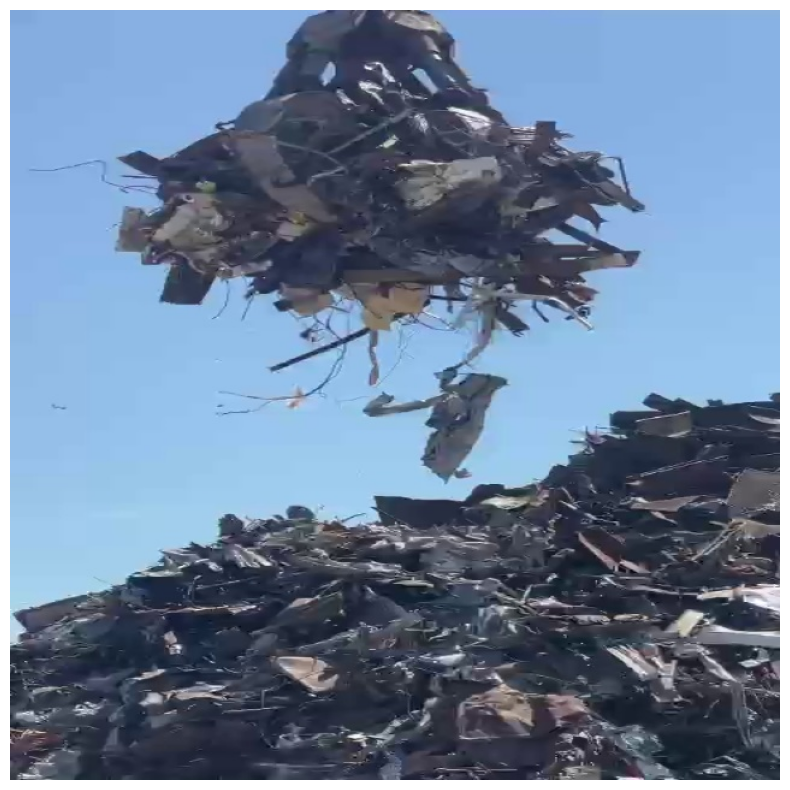

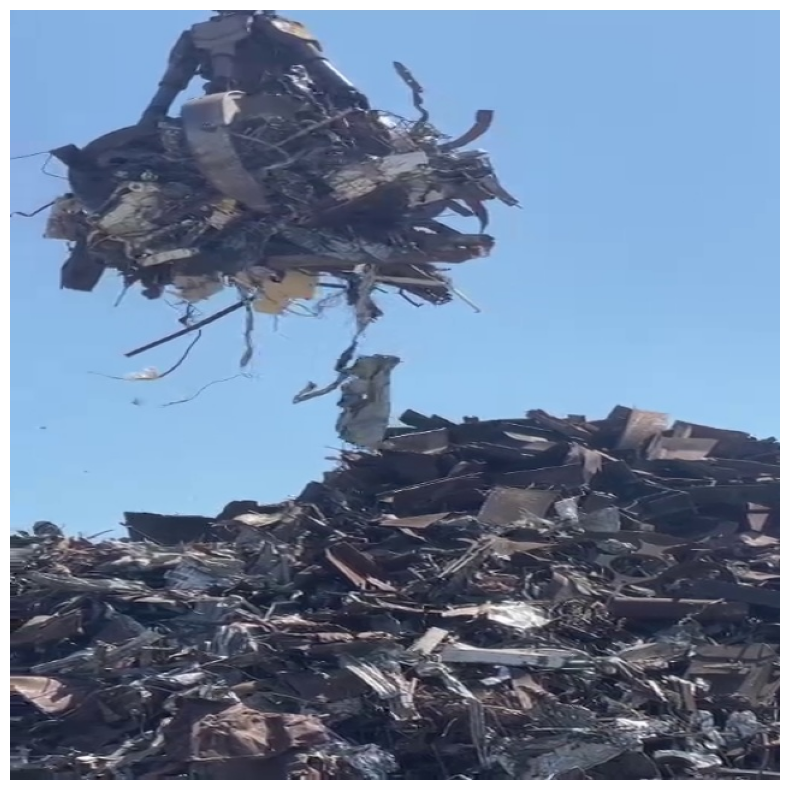

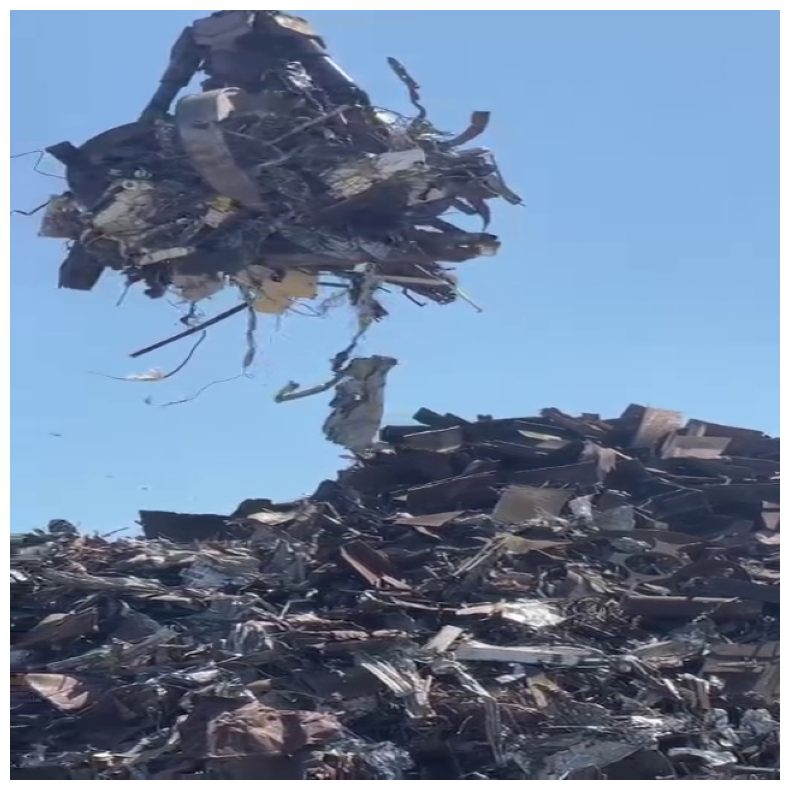

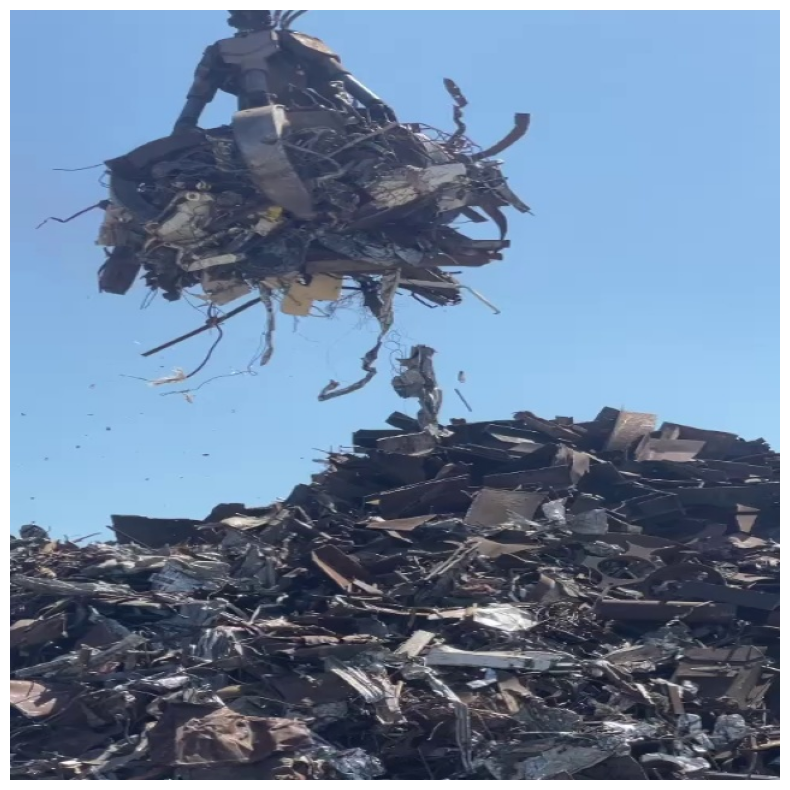

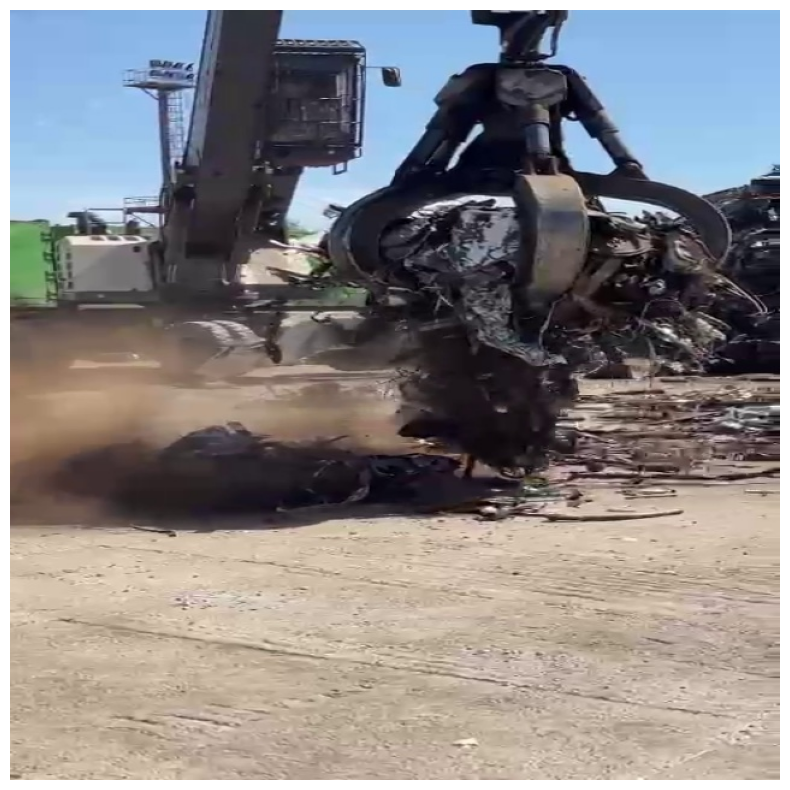

In [ ]:
file_list = glob.glob('/content/drive/MyDrive/video/*')  # Замените 'путь_к_директории' на реальный путь к вашей директории

# Выбираем случайные 5 изображений
random_images = random.sample(file_list, 5)

# Отображаем каждое изображение с помощью функции show_image
for image_path in random_images:
    show_image(image_path)

In [ ]:
cut_frames_from_video( "/content/drive/MyDrive/Выгрузка 1.mp4", "/content/drive/MyDrive/video1", 4000)

In [ ]:
cut_frames_from_video( "/content/drive/MyDrive/Выгрузка 2.mp4", "/content/drive/MyDrive/video2", 4000)